# HW3 Support Vector Machine and Decision Trees

# Due on 11/30 23:59 pm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## We will use the same affair dataset from HW2, but will skip the EDA phrase we have done enough of it

#### Everything removing outliers, create dummies variabes had been done for you

In [2]:
# Remember the affair data set from HW3, we will use that dataset again
# but we will directly load from file
orig_df = pd.read_csv("affairs2.csv")
# Set up our target class label
orig_df['had_affair'] = orig_df['affairs'].apply(lambda x: 1 if x != 0 else 0)
orig_df = orig_df.drop('affairs',axis=1)
# remove NA
orig_df.dropna(inplace=True)
# create dummies variable for occupation
occ = pd.get_dummies(orig_df['occupation'],drop_first=True)
# we include rate_marriage feature as well. In HW3, we did not include that variable
features = ['rate_marriage','age','yrs_married','children','religious','educ', 'had_affair']
df = orig_df
df = pd.concat([orig_df[features], occ], axis=1)
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,had_affair,occ2,occ3,occ4,occ5,occ6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,1,0,0,0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,1,0,1,0,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1,0,1,0,0,0
3,4.0,37.0,16.5,4.0,3.0,16.0,1,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,1,0,1,0,0,0


In [3]:
# make sure there is no missing values
df.isnull().sum()

rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
had_affair       0
occ2             0
occ3             0
occ4             0
occ5             0
occ6             0
dtype: int64

### Now we are ready to build models

### Question 1: Build a classification model using SVC using linear kernel with usual steps

In [4]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X = df.drop('had_affair', axis = 1).values
#X = df[['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ', 'had_affair', 'occ2', 'occ3', 'occ4', 'occ5', 'occ6']].as_matrix()
Y = df['had_affair'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model = svm.SVC(kernel='linear')
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       885
           1       0.68      0.33      0.44       389

    accuracy                           0.75      1274
   macro avg       0.72      0.63      0.64      1274
weighted avg       0.73      0.75      0.72      1274

0.7472527472527473


### Question 2. Now try different value of C-parameter and rerun your model

Type your code here

In [5]:
# Try C = 2**-5 and 2**5
def fit_and_evaluate(model, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)

    print(classification_report(Y_test, Y_pred))
    print(accuracy_score(Y_test, Y_pred))

model = svm.SVC(kernel='linear', C=2**-5)
fit_and_evaluate(model, X_train, Y_train, X_test, Y_test)

model = svm.SVC(kernel='linear', C=2**5)
fit_and_evaluate(model, X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       885
           1       0.69      0.32      0.43       389

    accuracy                           0.75      1274
   macro avg       0.72      0.63      0.64      1274
weighted avg       0.74      0.75      0.71      1274

0.7480376766091051
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       885
           1       0.68      0.33      0.44       389

    accuracy                           0.75      1274
   macro avg       0.72      0.63      0.64      1274
weighted avg       0.73      0.75      0.72      1274

0.7472527472527473


### Question 3. Try using rbf as your kernel and use Gamma of 2**-5, 0.1, 1 and 2

In [6]:
model = svm.SVC(kernel='rbf', gamma=2**-5)
fit_and_evaluate(model, X_train, Y_train, X_test, Y_test)

model = svm.SVC(kernel='rbf', gamma=0.1)
fit_and_evaluate(model, X_train, Y_train, X_test, Y_test)

model = svm.SVC(kernel='rbf', gamma=1)
fit_and_evaluate(model, X_train, Y_train, X_test, Y_test)

model = svm.SVC(kernel='rbf', gamma=2)
fit_and_evaluate(model, X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       885
           1       0.66      0.31      0.42       389

    accuracy                           0.74      1274
   macro avg       0.71      0.62      0.63      1274
weighted avg       0.72      0.74      0.71      1274

0.7401883830455259
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       885
           1       0.60      0.31      0.41       389

    accuracy                           0.73      1274
   macro avg       0.68      0.61      0.62      1274
weighted avg       0.71      0.73      0.70      1274

0.7276295133437991
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       885
           1       0.48      0.25      0.33       389

    accuracy                           0.69      1274
   macro avg       0.61      0.57      0.57      1274
weighted avg       0.65      0.69   

### Question 4. So out of all the models you try in Question 2 and 3, what is the best choice for the kernel, C and gamma parameters?

The best model had a rbf kernel, C=1, and gamma of 2**-5.

# Now we will try to fit the same dataset with Decision Trees

### Question 5. Build a Decision Tree Classifier using default parameter

In [7]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

### Question 6. Now try using max_depth = 2, 3, 4 and crierion = 'gini' and 'entropy' to build 3 X 2 = 6 different models

In [8]:
model1 = DecisionTreeClassifier(max_depth=2, criterion='gini')
model1.fit(X_train, Y_train)
fit_and_evaluate(model1, X_train, Y_train, X_test, Y_test)

model2 = DecisionTreeClassifier(max_depth=2, criterion='entropy')
model2.fit(X_train, Y_train)
fit_and_evaluate(model2, X_train, Y_train, X_test, Y_test)

model3 = DecisionTreeClassifier(max_depth=3, criterion='gini')
model3.fit(X_train, Y_train)
fit_and_evaluate(model3, X_train, Y_train, X_test, Y_test)

model4 = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model4.fit(X_train, Y_train)
fit_and_evaluate(model4, X_train, Y_train, X_test, Y_test)

model5 = DecisionTreeClassifier(max_depth=4, criterion='gini')
model5.fit(X_train, Y_train)
fit_and_evaluate(model5, X_train, Y_train, X_test, Y_test)

model6 = DecisionTreeClassifier(max_depth=4, criterion='entropy')
model6.fit(X_train, Y_train)
fit_and_evaluate(model6, X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       885
           1       0.65      0.32      0.43       389

    accuracy                           0.74      1274
   macro avg       0.70      0.62      0.63      1274
weighted avg       0.72      0.74      0.71      1274

0.7401883830455259
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       885
           1       0.65      0.32      0.43       389

    accuracy                           0.74      1274
   macro avg       0.70      0.62      0.63      1274
weighted avg       0.72      0.74      0.71      1274

0.7401883830455259
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       885
           1       0.66      0.29      0.40       389

    accuracy                           0.74      1274
   macro avg       0.70      0.61      0.61      1274
weighted avg       0.72      0.74   

### Question 7. What is your obsevation from Question 6? Does the choice of the criterion important in this case? What about the max_depth? What is the best choice of max_depth and criterion?

Answer: The choice of criterion does not appear to make any difference in our case. The max depth does. The best choice is a depth of 2 and the criterion can be either. 

## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [9]:
df.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'had_affair', 'occ2', 'occ3', 'occ4', 'occ5', 'occ6'],
      dtype='object')

In [10]:

features

['rate_marriage',
 'age',
 'yrs_married',
 'children',
 'religious',
 'educ',
 'had_affair']

In [11]:
from IPython.display import Image  
#from sklearn.externals.six import StringIO 
#import os
#os.system("pip install six")
from six import StringIO 
from sklearn.tree import export_graphviz
import io
import pydot 

# Pick up all featurs columns from your data frame
features = list(df.drop(['had_affair'],axis=1).columns)
features

['rate_marriage',
 'age',
 'yrs_married',
 'children',
 'religious',
 'educ',
 'occ2',
 'occ3',
 'occ4',
 'occ5',
 'occ6']

In [12]:
import sys
print(sys.path)

['C:\\Users\\wangr\\Desktop\\Data Analytics HW 3', 'C:\\Users\\wangr\\anaconda3\\python38.zip', 'C:\\Users\\wangr\\anaconda3\\DLLs', 'C:\\Users\\wangr\\anaconda3\\lib', 'C:\\Users\\wangr\\anaconda3', '', 'C:\\Users\\wangr\\anaconda3\\lib\\site-packages', 'C:\\Users\\wangr\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\wangr\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\wangr\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\wangr\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\wangr\\.ipython']


### Question 8, now pick three models, with max_depth = 2, 3 and 4. You can pick the which ever criterions you want and visual the three trees

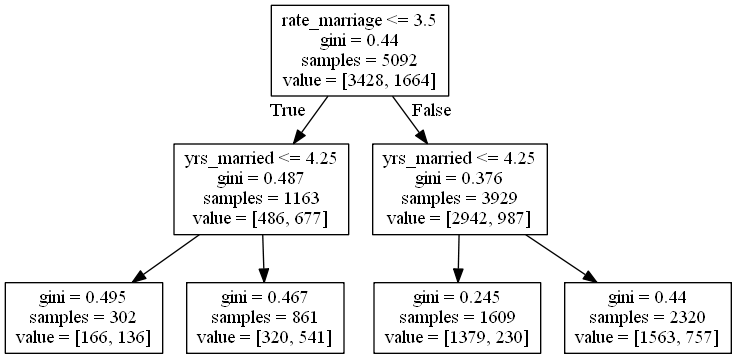

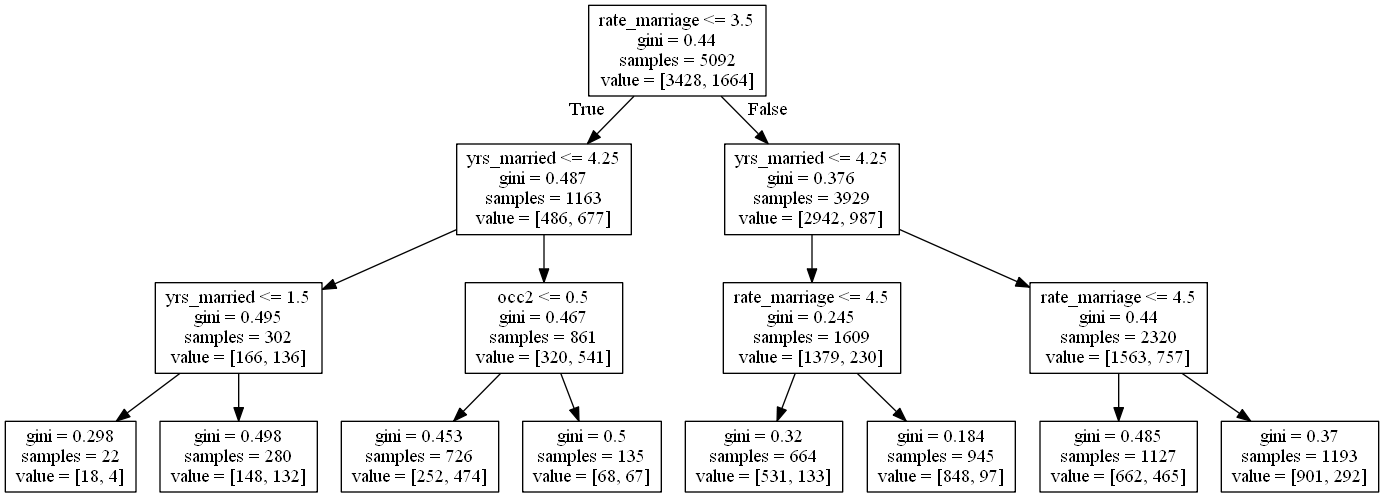

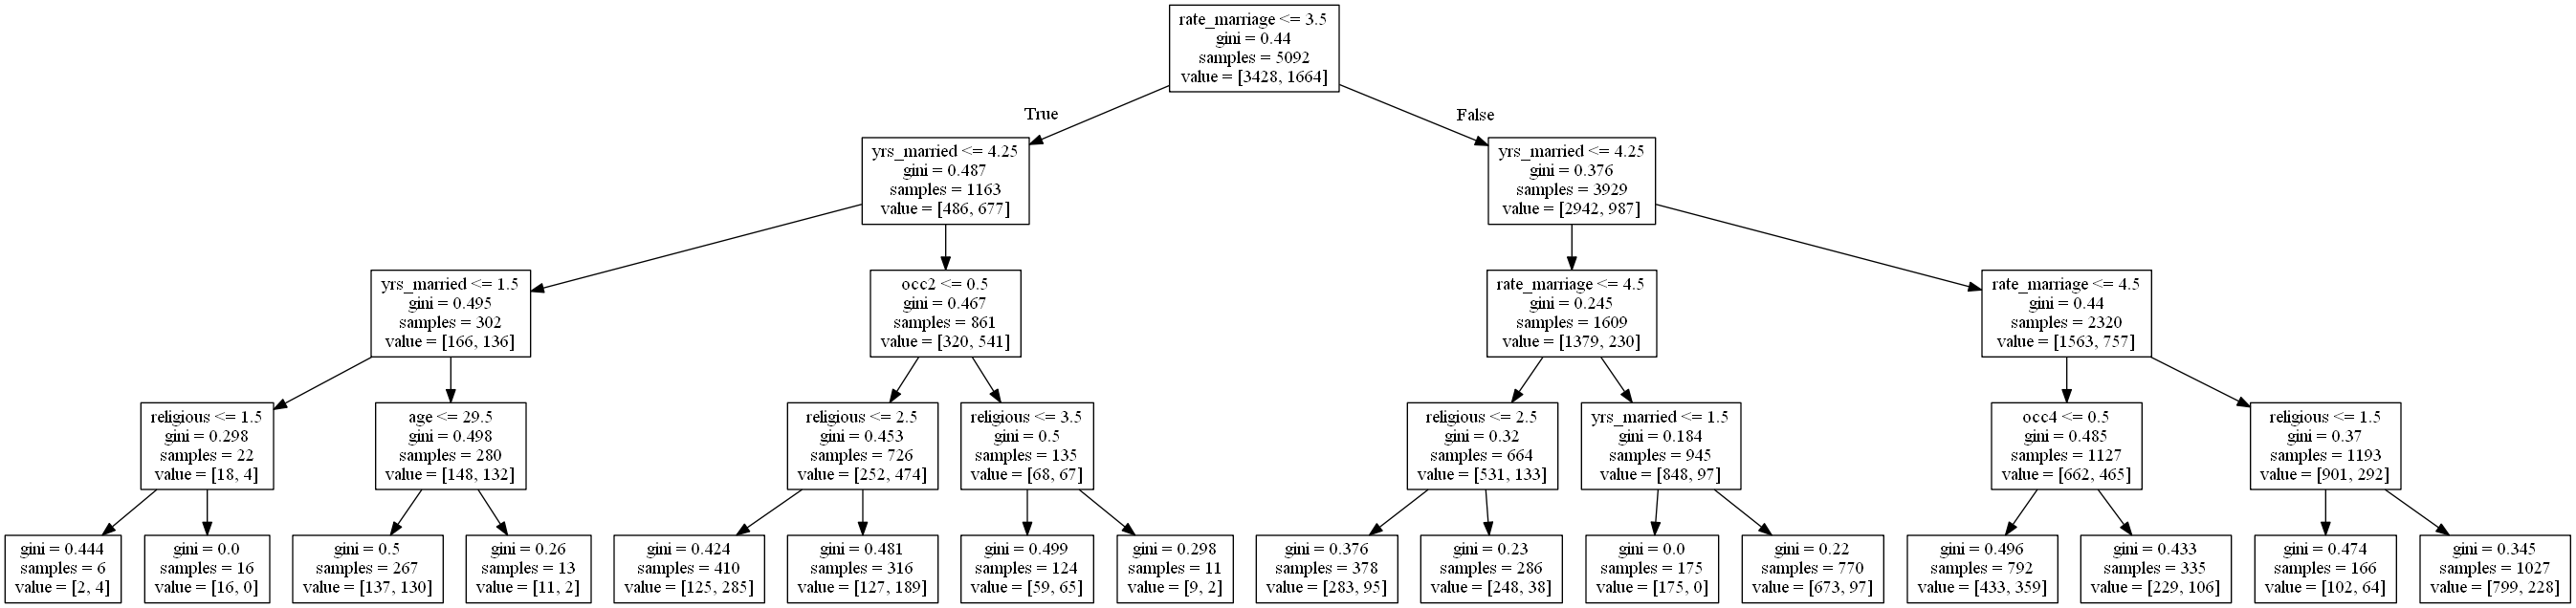

In [13]:
def visualize_model(mod):
    dot_data = StringIO()  

    export_graphviz(mod, out_file=dot_data, feature_names=features)
    (graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())
    display(Image(graph.create_png()))

visualize_model(model1)
visualize_model(model3)
visualize_model(model5)

### Question 9. Now build a Random Forest Classifier with, say, 100 trees. Check the model performance 

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)

Y_pred = rfc.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       885
           1       0.48      0.40      0.44       389

    accuracy                           0.68      1274
   macro avg       0.62      0.60      0.61      1274
weighted avg       0.67      0.68      0.68      1274

0.6836734693877551
